<a href="https://colab.research.google.com/github/AnnaBujniewicz/Masters_thesis/blob/main/2_Technical_and_Fundamental_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance > /dev/null 2>&1
! mkdir hist
!pip install mplfinance

     |████████████████████████████████| 71kB 2.8MB/s 


In [ ]:
import mplfinance as mpl
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
!wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib

Selecting previously unselected package libta-lib0.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 276kB 3.6MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.19-cp37-cp37m-linux_x86_64.whl size=1437979 sha256=c6ab5fbe5250d9750a9d5e1448757da1936e8f73581f4b872efdd2aa0862c9c7
  Stored in directory: /root/.cache/pip/wheels/a3/f6/12/3d1ccd06caadd8fa47e016991dd0d27f1163bb260f1854e2ff
Successfully built ta-lib


In [ ]:
! pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=62a06eb0417c6af9618006318e1a52b754ba596071027cbe02eb6fec536d9129
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [ ]:
# Load packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import os, contextlib
import shutil
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from talib import abstract

#Load information for the companies for different analysis

In [ ]:
wiki=pd.read_html('https://en.wikipedia.org/wiki/NASDAQ-100')

In [ ]:
n100_list = wiki[3]
#creat df from the company info
n100 = n100_list
n100.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Alexion Pharmaceuticals,ALXN,Health Care,Pharmaceuticals
4,Align Technology,ALGN,Health Care,Health Care Supplies


In [ ]:
#load thickers
ticker_list = list(n100["Ticker"])

In [ ]:
#load hourly stock prices
dataframes = {}
df = pd.DataFrame()
for tick in ticker_list:
  dataframes[tick] = yf.download(tick, 
                      start='2020-12-01', 
                      end='2021-02-01', 
                      interval = '1h')
  #dataframes
  df[tick] = dataframes[tick].iloc[:,3]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
dataframes

{'AAPL':                                  Open        High  ...   Adj Close    Volume
 2020-12-01 09:30:00-05:00  120.750000  122.959999  ...  122.059998  39051989
 2020-12-01 10:30:00-05:00  122.065002  122.839996  ...  122.709999  18218963
 2020-12-01 11:30:00-05:00  122.709999  123.469299  ...  122.889999  17228036
 2020-12-01 12:30:00-05:00  122.889999  123.120003  ...  123.019997   8938966
 2020-12-01 13:30:00-05:00  123.025002  123.290001  ...  123.080002   9452729
 ...                               ...         ...  ...         ...       ...
 2021-01-29 11:30:00-05:00  132.190002  133.309998  ...  131.968506  24633709
 2021-01-29 12:30:00-05:00  131.949997  132.229996  ...  132.050003  27628621
 2021-01-29 13:30:00-05:00  132.050003  132.809998  ...  131.945007  18117645
 2021-01-29 14:30:00-05:00  131.929993  133.220001  ...  132.533203  17380585
 2021-01-29 15:30:00-05:00  132.539993  133.500000  ...  131.809998  17152038
 
 [284 rows x 6 columns],
 'ADBE':                     

In [ ]:
#the hour price which we will work with
df.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
2020-12-01 09:30:00-05:00,78.970001,472.899994,92.355003,123.309998,493.459991,1789.224976,1793.862793,3167.969971,85.605003,225.125000,140.589996,339.584015,122.059998,83.500000,447.459991,223.389999,277.684998,176.085205,140.649994,244.009995,2057.439941,402.445007,115.519997,132.585007,75.470001,661.609985,118.839996,362.489990,43.994999,78.769997,50.639999,116.599998,385.709991,91.750000,324.390015,214.145004,111.430000,50.570000,126.730003,41.556999,...,1539.699951,136.505005,67.019997,213.852097,167.300003,58.169998,86.400002,90.199997,503.434998,532.783203,160.089996,451.660004,237.289993,88.720001,93.620003,217.214996,113.150002,145.880005,135.743301,150.406906,522.627991,109.919998,176.740005,6.595,143.020004,203.110001,98.570000,227.850006,132.899307,581.831970,163.270004,34.380001,200.365005,201.119995,229.160004,39.017300,226.195007,68.675003,145.035004,416.779999
2020-12-01 10:30:00-05:00,79.089996,475.589996,93.549896,121.610001,508.959991,1790.864990,1796.500000,3184.219971,85.769997,224.039993,141.199997,340.950012,122.709999,83.980003,450.260010,223.675003,278.839996,175.529999,140.850006,242.792007,2065.110107,402.959991,115.220001,132.389999,75.410004,660.820007,117.974998,358.339996,43.685001,78.320000,50.770000,116.449997,384.959991,91.150002,324.480011,212.500000,111.660004,51.000000,126.180000,41.570000,...,1528.500000,137.490005,68.250000,213.990005,162.684998,58.250000,86.349998,90.629997,503.065002,536.474976,160.630005,445.755005,238.410004,88.237503,93.599998,216.929993,113.339996,145.789993,136.089996,151.619995,519.000000,109.714996,176.934998,6.505,143.613998,206.000000,98.709999,228.039993,132.800003,580.969971,163.559998,34.520000,200.570007,201.190002,229.500000,38.494999,226.259995,68.750000,146.820007,414.519989
2020-12-01 11:30:00-05:00,79.349297,477.549988,92.850098,121.849998,498.190002,1814.000000,1817.859985,3215.975098,85.440002,224.164993,141.220001,340.299988,122.889999,84.099998,451.179993,222.845001,276.570007,175.410004,141.904999,241.910004,2072.870117,403.600006,115.360001,132.205002,75.320000,662.830017,118.599998,358.710114,43.740002,78.290001,51.105000,115.919998,385.998291,90.720001,325.484985,213.140701,111.589996,51.090000,127.459999,41.419998,...,1531.566772,136.970001,67.908997,215.460007,156.479996,58.299999,86.459999,90.440002,505.799988,538.429016,161.233597,447.825012,238.179993,88.242500,93.589996,217.520004,112.019997,145.720001,135.720001,152.029999,523.719971,110.330002,178.679993,6.495,144.091003,205.899994,98.790001,228.720001,133.440002,582.520020,163.529999,34.584999,200.830002,201.750000,229.395004,38.490002,227.509995,68.699600,146.190002,411.809998
2020-12-01 12:30:00-05:00,79.875000,479.470001,92.690002,121.834999,503.135406,1812.880005,1818.810059,3247.750000,85.309998,225.320007,140.979996,340.890015,123.019997,84.239998,449.725006,222.860001,277.269989,175.190002,141.440002,242.160004,2080.649902,403.834991,115.445000,132.490005,75.480003,663.510010,118.550003,358.070007,43.619999,78.580002,51.220001,115.639999,386.929993,90.419998,328.100006,214.588501,111.529999,51.389999,127.500000,41.230000,...,1543.439941,137.229996,67.720001,216.100006,143.664993,58.490002,86.660004,90.599998,508.760010,536.960388,160.660004,451.100006,239.279999,87.849998,93.559998,219.184692,112.000000,146.070007,136.100006,151.604996,520.690002,110.720001,179.149994,6.505,144.229996,206.429993,98.830002,229.574997,133.479996,582.400024,163.619995,34.400002,201.919998,200.779999,229.449997,38.375000,228.315002,68.459999,145.735001,408.489990
2020-12-01 13:30:00-05:00,79.559998,479.480011,92.73500

In [ ]:
#rename the index
df.index.name = 'date'

In [ ]:
#load open prices
open = yf.download(ticker_list, start='2019-10-30', end='2020-12-01')['Open']

[*********************100%***********************]  102 of 102 completed


# Visualization

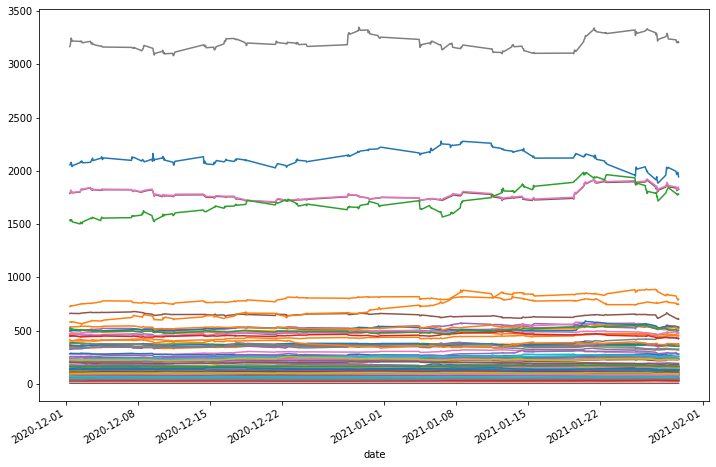

In [ ]:
#visualization for the companies through time
df.plot.line(legend=False, figsize=(12,8) )

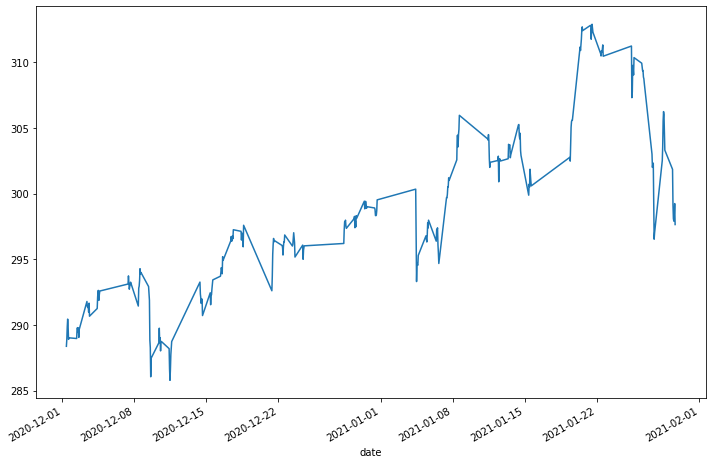

In [ ]:
#average of the 100 how it is developing
plt.figure(figsize=(12,8))
df['average'] = df.mean(axis=1)
df['average'].plot.line()

In [ ]:
stock_returns = df.apply(np.log).diff(1)

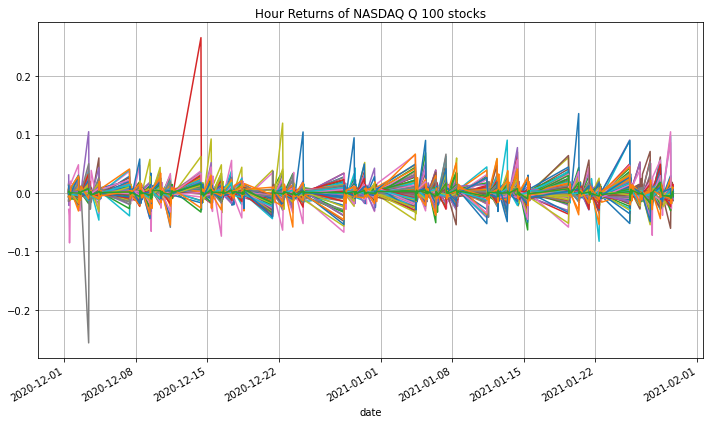

In [ ]:
#plot the returns development
stock_returns.plot(legend=0, figsize=(10,6), grid=True, title='Hour Returns of NASDAQ Q 100 stocks')
plt.tight_layout()

In [ ]:
stock_returns.describe()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,ADI,ANSS,AAPL,AMAT,ASML,TEAM,ADSK,ADP,BIDU,BIIB,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,...,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,OKTA,PCAR,PAYX,PYPL,PTON,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TSLA,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM,average
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,2.830000e+02,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.000501,-0.000107,-0.000268,0.000768,0.000214,0.000073,0.000076,0.000043,-0.000199,0.000245,0.000165,0.000153,0.000272,0.000516,0.000626,0.000123,-0.000003,-0.000231,0.001813,0.000517,-0.000200,0.000392,0.000427,-0.000028,0.000211,-0.000301,0.000257,-0.000461,0.000047,-0.000038,-0.000076,-0.000214,-0.000323,-0.000239,0.000515,0.000299,-0.000326,0.000391,0.000431,-5.952537e-07,...,-0.000016,0.000548,0.000284,0.000122,-0.000170,0.000016,0.000856,0.000198,-0.000092,0.000007,-0.000215,0.000313,0.000097,-0.000246,0.000268,0.000908,-0.000233,0.000703,0.000136,-0.000129,0.000044,-0.000259,-0.000184,0.000595,-0.000730,-0.000064,0.000400,-0.000187,0.001096,0.000053,-0.000272,-0.000115,-0.000325,-0.000005,0.000893,0.000021,-0.000252,-0.000375,-0.000401,0.000112
std,0.005901,0.005646,0.009929,0.016422,0.008868,0.005857,0.005731,0.005172,0.004991,0.005466,0.005930,0.006805,0.007374,0.009150,0.007533,0.008217,0.006818,0.005936,0.015827,0.009285,0.008949,0.005710,0.006610,0.005906,0.004824,0.007510,0.006241,0.006462,0.004243,0.005880,0.006012,0.006014,0.003625,0.005792,0.009007,0.011046,0.005915,0.007045,0.005783,5.742190e-03,...,0.007418,0.009831,0.005475,0.021389,0.003924,0.004956,0.010735,0.010885,0.007994,0.009015,0.006260,0.011455,0.007411,0.004854,0.007926,0.014538,0.004140,0.017618,0.008085,0.007537,0.006947,0.008060,0.008434,0.011133,0.017245,0.006530,0.006876,0.005917,0.012471,0.005840,0.008486,0.005149,0.005019,0.007223,0.008954,0.008114,0.005164,0.010231,0.012291,0.004035
min,-0.032159,-0.027575,-0.050337,-0.019356,-0.028953,-0.030310,-0.029269,-0.015789,-0.021099,-0.026901,-0.022897,-0.032620,-0.021699,-0.039716,-0.033186,-0.039158,-0.040177,-0.038776,-0.048074,-0.029096,-0.052186,-0.020190,-0.028083,-0.035352,-0.029291,-0.060521,-0.022016,-0.034889,-0.026876,-0.025334,-0.026297,-0.030368,-0.018360,-0.034645,-0.042189,-0.048561,-0.022967,-0.030230,-0.024523,-2.811048e-02,...,-0.046159,-0.029229,-0.016493,-0.085444,-0.019944,-0.025841,-0.038886,-0.027193,-0.025421,-0.063261,-0.037598,-0.044084,-0.032096,-0.021147,-0.032629,-0.056779,-0.023744,-0.053803,-0.054755,-0.046208,-0.029653,-0.036636,-0.054457,-0.044999,-0.256831,-0.054375,-0.027022,-0.032562,-0.043976,-0.029773,-0.039172,-0.029806,-0.029461,-0.043782,-0.019305,-0.032923,-0.022722,-0.048970,-0.058318,-0.017676
25%,-0.001961,-0.003118,-0.004527,-0.002262,-0.003916,-0.002891,-0.003025,-0.002404,-0.002921,-0.002151,-0.002436,-0.002903,-0.002876,-0.003179,-0.002679,-0.003717,-0.003155,-0.002113,-0.004994,-0.003497,-0.004075,-0.001998,-0.002760,-0.002894,-0.002279,-0.002874,-0.002715,-0.003816,-0.002040,-0.002643,-0.002290,-0.002868,-0.001869,-0.002666,-0.003665,-0.005508,-0.003344,-0.003327,-0.001981,-3.030258e

In [ ]:
# https://www.youtube.com/watch?v=vKWf5skmGAI&ab_channel=ShaneLee
stockreturn = df.apply(lambda x: (x /x[0] * 100))

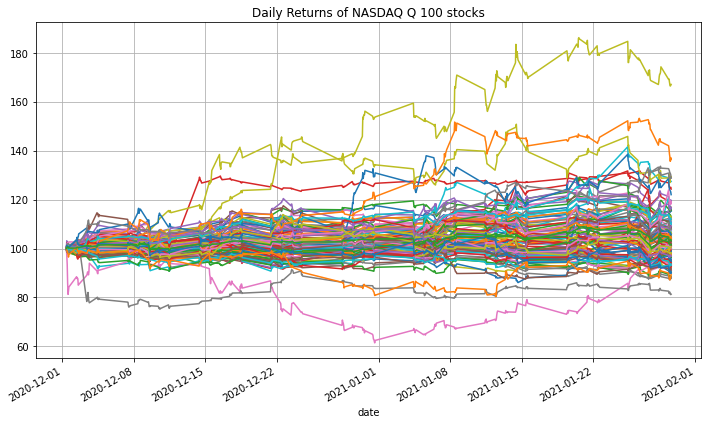

In [ ]:
#plot the returns development
stockreturn.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of NASDAQ Q 100 stocks')
plt.tight_layout()

# Classification of different sectors

In [ ]:
#load daily stock prices
dataframes1 = {}
df1 = pd. DataFrame()
for tick in ticker_list:
  dataframes1[tick] = yf.download(tick, 
                      start='2020-12-01', 
                      end='2021-02-01')
  df1[tick] = dataframes1[tick].iloc[:,3]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
#create a time period
q1 = df1.loc['2020-12-01':'2021-02-01']

In [ ]:
# Create empty dataframe
# add the tickers into the dataframe
stocks = pd.DataFrame(data=None, columns=['ticker', 'company', 'sector', 'industry'])
stocks['ticker']=q1.columns

In [ ]:
# add sector

for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['sector'][i] = n100['GICS Sector'][j]
    else: continue

# add industry

for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['industry'][i] = n100['GICS Sub-Industry'][j]
    else: continue

#add company names
for i in range(len(stocks)):
  for j in range(len(n100['Ticker'])):
    if stocks['ticker'][i] == n100['Ticker'][j]:
      stocks['company'][i] = n100['Company'][j]
    else: continue

In [ ]:
stocks['return'] = [(q1[i]['2021-01-29']/q1[i]['2020-12-01'] -1 ) for i in stocks['ticker']]

In [ ]:
 stocks

,ticker,company,sector,industry,return
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.138496
1,ADBE,Adobe Inc.,Information Technology,Application Software,-0.042534
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,-0.075461
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,0.255260
4,ALGN,Align Technology,Health Care,Health Care Supplies,0.050550
...,...,...,...,...,...
97,WBA,"Walgreen Boots Alliance, Inc.",Consumer Staples,Drug Retail,0.306552
98,WDAY,"Workday, Inc.",Information Technology,Application Software,0.008108
99,XEL,Xcel Energy Inc.,Utilities,Multi-Utilities,-0.064610
100,XLNX,"Xilinx, Inc.",Information Technology,Semiconductors,-0.104458


In [ ]:
#displaying the returns for different companies 
print(len(stocks[stocks['return'] > 0]))
stocks[stocks['return'] > 0]

60


,ticker,company,sector,industry,return
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.138496
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,0.255260
4,ALGN,Align Technology,Health Care,Health Care Supplies,0.050550
5,GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services,0.017824
6,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services,0.020933
9,AMGN,Amgen,Health Care,Biotechnology,0.072641
10,ADI,Analog Devices,Information Technology,Semiconductors,0.046898
11,ANSS,Ansys,Information Technology,Application Software,0.039666
12,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.075293
13,AMAT,"Applied Materials, Inc.",Information Technology,Semiconductor Equipment,0.147265


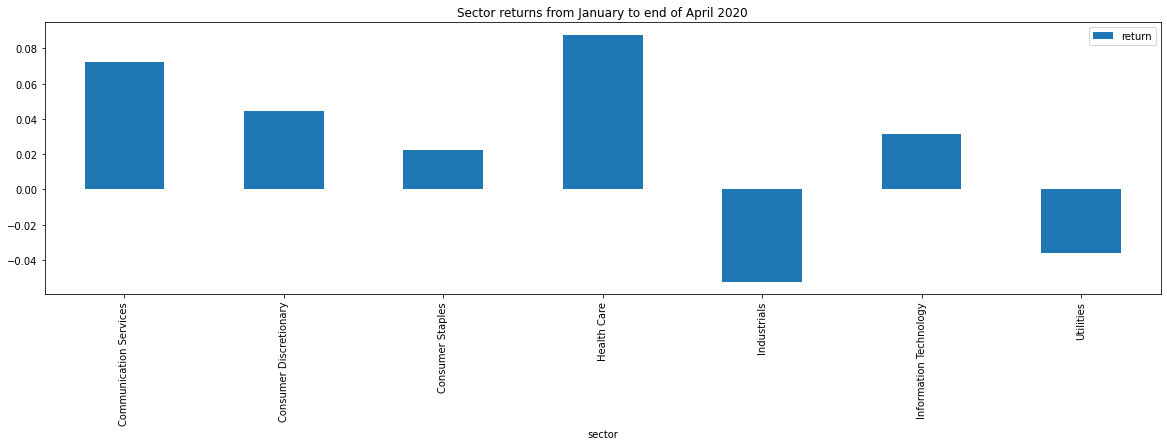

In [ ]:
#visualizing the returns in accordance to the sectors
sector_return = stocks.groupby('sector').mean()
sector_return.plot.bar(figsize=(20,5))
plt.title('Sector returns from January to end of April 2020')
plt.savefig('sectors.png', bbox_inches='tight')

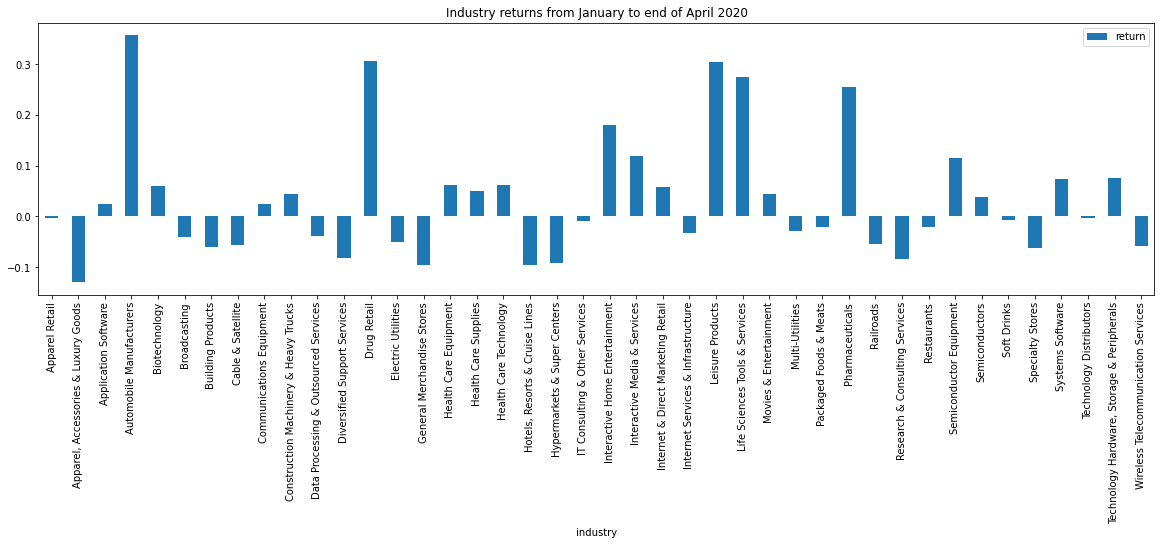

In [ ]:
#visualizing the returns according to the industry
industry_return = stocks.groupby('industry').mean()
industry_return.plot.bar(figsize=(20,5))
plt.title('Industry returns from January to end of April 2020')
plt.savefig('industries.png', bbox_inches='tight')

In [ ]:
#creating a column where we display positive, neutral or ngeative the return
stocks['return_class'] = 'tbd'
for i in range(len(stocks)):
  if stocks['return'][i] > 0:
    stocks['return_class'][i] = 'positive'
  elif stocks['return'][i] < 0:
    stocks['return_class'][i] = 'negative'
  else: stocks['return_class'][i] = 'neutral'

In [ ]:
stocks.head()

,ticker,company,sector,industry,return,return_class
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.138496,positive
1,ADBE,Adobe Inc.,Information Technology,Application Software,-0.042534,negative
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,-0.075461,negative
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,0.255260,positive
4,ALGN,Align Technology,Health Care,Health Care Supplies,0.050550,positive


In [ ]:
stocks['return_class'].value_counts()

positive    59
negative    42
neutral      1
Name: return_class, dtype: int64

#Fundamental indicators

In [ ]:
#define which of the fundamental to keep
ts = yf.Ticker("ZM")
all = list(ts.info.keys())

In [ ]:
all

['zip',
 'sector',
 'fullTimeEmployees',
 'longBusinessSummary',
 'city',
 'phone',
 'state',
 'country',
 'companyOfficers',
 'website',
 'maxAge',
 'address1',
 'industry',
 'address2',
 'previousClose',
 'regularMarketOpen',
 'twoHundredDayAverage',
 'trailingAnnualDividendYield',
 'payoutRatio',
 'volume24Hr',
 'regularMarketDayHigh',
 'navPrice',
 'averageDailyVolume10Day',
 'totalAssets',
 'regularMarketPreviousClose',
 'fiftyDayAverage',
 'trailingAnnualDividendRate',
 'open',
 'toCurrency',
 'averageVolume10days',
 'expireDate',
 'yield',
 'algorithm',
 'dividendRate',
 'exDividendDate',
 'beta',
 'circulatingSupply',
 'startDate',
 'regularMarketDayLow',
 'priceHint',
 'currency',
 'trailingPE',
 'regularMarketVolume',
 'lastMarket',
 'maxSupply',
 'openInterest',
 'marketCap',
 'volumeAllCurrencies',
 'strikePrice',
 'averageVolume',
 'priceToSalesTrailing12Months',
 'dayLow',
 'ask',
 'ytdReturn',
 'askSize',
 'volume',
 'fiftyTwoWeekHigh',
 'forwardPE',
 'fromCurrency',
 'f

In [ ]:
to_keep = ['beta', 'enterpriseToEbitda', 'enterpriseToRevenue', 'forwardEps', 'trailingEps', 'forwardPE', 'trailingPE', 'fullTimeEmployees', 'priceToBook', 'profitMargins']
to_drop = [field for field in all if field not in to_keep]

In [ ]:
#get the statistics
n100_stats = {}
for symbol in symbols_filtered:
    ticker1 = yf.Ticker(symbol)
    temp = ticker1.info
 
    n100_stats[symbol] = temp

In [ ]:
#combine all the stats valuation tables into a single data frame
combined_stats = pd.DataFrame(n100_stats)

#filter not needed rows
#drope the missing values
#combined_stats.drop(to_drop, inplace=True)
combined_stats.drop(['fax','underlyingSymbol','underlyingExchangeSymbol','headSymbol','uuid'], inplace=True)
combined_stats=combined_stats.transpose()
#display the data
combined_stats.head()

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,...,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,err
ATVI,90405,Communication Services,9500,"Activision Blizzard, Inc., together with its s...",Santa Monica,310 255 2000,CA,United States,[],http://www.activisionblizzard.com,1,3100 Ocean Park Boulevard,Electronic Gaming & Multimedia,95.78,95.1,87.6853,0.00490708,0.1454,None,96.28,None,5136260,None,95.78,93.7227,0.47,95.1,None,5136260,None,None,None,0.47,1618358400,0.63541,None,None,95,2,USD,...,774753984,None,None,19.422,12959491,0.0167,None,1609372800,0.9052,2196999936,2.82,0.41,0.450707,4.95006,0.01306,1672444800,1609372800,2.25,1614297600,765573131,69289934848,None,1220832000,2:1,None,1586822400,None,-0.03,1617148800,1.37,None,0.0169,8893982,None,None,None,96.14,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN
ADBE,95110-2704,Technology,22516,Adobe Inc. operates as a diversified software ...,San Jose,408 536 6000,CA,United States,[],http://www.adobe.com,1,345 Park Avenue,Software—Infrastructure,504.04,499.29,476.619,None,0,None,506.92,None,2070100,None,504.04,461.047,None,499.29,None,2070100,None,None,None,None,1111622400,0.948152,None,None,498.44,2,USD,...,478000000,None,None,28.28,5068426,0.0106,None,1606435200,0.85712,5566000128,11.486,0.0065,0.450707,17.8936,0.00297,1669507200,1614902400,1.71,1613088000,476417820,240675127296,None,1116892800,2:1,None,1111622400,None,0.32,1615766400,2.12,None,0.0106,4908064,None,None,None,506.03,https://logo.clearbit.com/adobe.com,NaN,NaN
AMD,95054,Technology,12600,"Advanced Micro Devices, Inc. operates as a sem...",Santa Clara,408 749 4000,CA,United States,[],http://www.amd.com,1,2485 Augustine Drive,Semiconductors,82.76,82.055,85.8421,None,0,None,82.1788,None,34437000,None,82.76,80.6376,None,82.055,None,34437000,None,None,None,None,798940800,2.05571,None,None,78.03,2,USD,...,1211320064,None,None,4.82,81563521,0.0672,None,1608940800,0.77331,2489999872,2.064,None,0.450707,16.3029,0.00576,1672012800,1608940800,1.86,1614297600,1204545292,98527535104,None,966902400,2:1,None,None,None,9.476,1617148800,1.51,None,0.0675,79247010,None,None,None,78.58,https://logo.clearbit.com/amd.com,NaN,NaN
ALXN,02210,Healthcare,3837,"Alexion Pharmaceuticals, Inc. develops and com...",Boston,475 230 2596,MA,United States,[],http://www.alexion.com,1,121 Seaport Boulevard,Biotechnology,155.01,154.69,141.016,None,0,None,154.99,None,1425840,None,155.01,152.624,None,154.69,None,1425840,None,None,None,None,None,1.27027,None,None,153.94,2,USD,...,219848000,None,None,53.081,7835359,0.0356,None,1609372800,0.91318,603400000,2.72,None,0.450707,2.90141,0.00459,1672444800,1609372800,2.92,1614297600,218828513,33989519360,None,1306108800,2:1,None,None,None,-0.397,1617148800,1.34,None,0.0372,8451785,None,None,None,154.01,https://logo.clearbit.com/alexion.com,NaN,NaN
ALGN,85281,Healthcare,18070,"Align Technology, Inc., a medical device compa...",

In [ ]:
#merge the stock data and the statistical dataframe together
stock_stats = stocks.merge(combined_stats, left_on='ticker', right_index=True, how='outer')
stock_stats.head()

,ticker,company,sector_x,industry_x,return,return_class,zip,sector_y,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry_y,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,...,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,err
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,0.138496,positive,90405,Communication Services,9500,"Activision Blizzard, Inc., together with its s...",Santa Monica,310 255 2000,CA,United States,[],http://www.activisionblizzard.com,1,3100 Ocean Park Boulevard,Electronic Gaming & Multimedia,95.78,95.1,87.6853,0.00490708,0.1454,None,96.28,None,5136260,None,95.78,93.7227,0.47,95.1,None,5136260,None,None,None,0.47,1618358400,...,774753984,None,None,19.422,12959491,0.0167,None,1609372800,0.9052,2196999936,2.82,0.41,0.450707,4.95006,0.01306,1672444800,1609372800,2.25,1614297600,765573131,69289934848,None,1220832000,2:1,None,1586822400,None,-0.03,1617148800,1.37,None,0.0169,8893982,None,None,None,96.14,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN
1,ADBE,Adobe Inc.,Information Technology,Application Software,-0.042534,negative,95110-2704,Technology,22516,Adobe Inc. operates as a diversified software ...,San Jose,408 536 6000,CA,United States,[],http://www.adobe.com,1,345 Park Avenue,Software—Infrastructure,504.04,499.29,476.619,None,0,None,506.92,None,2070100,None,504.04,461.047,None,499.29,None,2070100,None,None,None,None,1111622400,...,478000000,None,None,28.28,5068426,0.0106,None,1606435200,0.85712,5566000128,11.486,0.0065,0.450707,17.8936,0.00297,1669507200,1614902400,1.71,1613088000,476417820,240675127296,None,1116892800,2:1,None,1111622400,None,0.32,1615766400,2.12,None,0.0106,4908064,None,None,None,506.03,https://logo.clearbit.com/adobe.com,NaN,NaN
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors,-0.075461,negative,95054,Technology,12600,"Advanced Micro Devices, Inc. operates as a sem...",Santa Clara,408 749 4000,CA,United States,[],http://www.amd.com,1,2485 Augustine Drive,Semiconductors,82.76,82.055,85.8421,None,0,None,82.1788,None,34437000,None,82.76,80.6376,None,82.055,None,34437000,None,None,None,None,798940800,...,1211320064,None,None,4.82,81563521,0.0672,None,1608940800,0.77331,2489999872,2.064,None,0.450707,16.3029,0.00576,1672012800,1608940800,1.86,1614297600,1204545292,98527535104,None,966902400,2:1,None,None,None,9.476,1617148800,1.51,None,0.0675,79247010,None,None,None,78.58,https://logo.clearbit.com/amd.com,NaN,NaN
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals,0.255260,positive,02210,Healthcare,3837,"Alexion Pharmaceuticals, Inc. develops and com...",Boston,475 230 2596,MA,United States,[],http://www.alexion.com,1,121 Seaport Boulevard,Biotechnology,155.01,154.69,141.016,None,0,None,154.99,None,1425840,None,155.01,152.624,None,154.69,None,1425840,None,None,None,None,None,...,219848000,None,None,53.081,7835359,0.0356,None,1609372800,0.91318,603400000,2.72,None,0.450707,2.90141,0.00459,1672444800,1609372800,2.92,1614297600,218828513,33989519360,None,1306108800,2:1,None,None,None,

In [ ]:
#creat a full statistical dataframe and deplace the None
stock_stats_full=stock_stats.replace('None',np.nan)
#impute missing values
imp=SimpleImputer(missing_values=np.nan)
# Check for NaN values
print(stock_stats.isna().sum().sum())

4072


# Technical Indicators from ta library

> Indented block


the summary of tech idicators need the closing price open and more 

In [ ]:
ticker = 'ALXN'

In [ ]:
tech = yf.download(ticker, start='2020-12-01', end='2021-02-01', interval="1h")

[*********************100%***********************]  1 of 1 completed


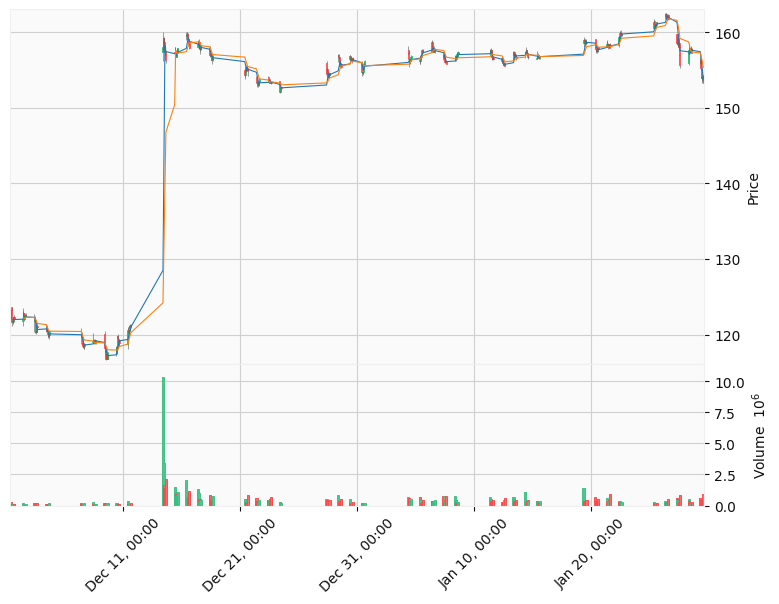

In [ ]:
mpl.plot(tech ,type="candle",volume=True, mav=(5,10), tight_layout=True, style="yahoo", show_nontrading=True)

In [ ]:
tech.head()

,Open,High,Low,Close,Adj Close,Volume
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,123.309998,264019
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,121.610001,106886
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,121.849998,76961
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,121.834999,91667
2020-12-01 13:30:00-05:00,121.830002,121.860001,121.510002,121.800003,121.800003,54366


In [ ]:
tech.drop(["Adj Close"],axis=1)

,Open,High,Low,Close,Volume
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,264019
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,106886
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,76961
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,91667
2020-12-01 13:30:00-05:00,121.830002,121.860001,121.510002,121.800003,54366
...,...,...,...,...,...
2021-01-29 11:30:00-05:00,155.110001,155.199997,154.000000,154.070007,289928
2021-01-29 12:30:00-05:00,154.080002,154.179993,153.240005,153.949997,425912
2021-01-29 13:30:00-05:00,153.949997,154.119995,153.559998,153.869995,211690
2021-01-29 14:30:00-05:00,153.809998,154.380005,153.539993,154.199997,487700


In [ ]:
df_tech= tech

In [ ]:
df_tech_ta = ta.add_all_ta_features(
    tech, "Open", "High", "Low", "Close", "Volume", fillna=True
)

In [ ]:
df_tech_ta.head()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,123.309998,264019,145287.208025,264019,0.550291,0.000000,50.000000,0.000000,0.000000,-34138.118139,1000.000000,123.000000,0.0,123.309998,123.309998,123.309998,0.000000,0.000000,0.0,0.0,123.000000,124.690002,121.309998,2.747971,0.591715,0.0,0.0,122.000000,123.690002,122.845001,1.370532,0.775145,0.0,0.000000,0.000000,0.000000,...,0.000000,-15.704603,1.000000,0.000000,25.494424,-171.328402,-171.328402,0.000000,122.845001,122.845001,122.845001,122.845001,147.91588,145.713503,4.0,4.0,0.0,-1.0,-1.000000,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.000000,0.000000,77.514536,77.514536,-22.485464,0.0,123.309998,0.0,0.000000,0.000000,0.000000,-17.132840,0.000000,0.000000
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,121.610001,106886,38401.208025,157133,0.103534,-181705.873810,0.000000,-536.554897,-536.554897,-46707.522989,986.213632,122.777144,0.0,122.459999,124.159996,120.760002,2.776412,0.250000,0.0,0.0,122.613333,124.383334,120.843333,2.887126,0.216573,0.0,0.0,121.610001,123.690002,122.650002,1.698515,0.000000,0.0,-0.135612,-0.027122,-0.108490,...,-0.021637,-0.002693,2.015090,-66.666667,26.344422,-177.040587,-174.184495,-2.856093,122.650002,122.650002,122.650002,122.650002,147.91588,145.713503,4.0,8.0,-4.0,-1.0,-1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-100.000000,0.000000,0.000000,38.757268,-100.000000,0.0,122.345420,0.0,-4.966657,-0.993331,-3.973326,-1.378637,-1.388228,-1.378637
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,121.849998,76961,100159.641413,234094,0.223638,-153109.252466,0.000000,-1063.000968,-799.777932,-1321.686814,988.159929,122.580592,0.0,122.256666,123.759136,120.754196,2.457895,0.364667,0.0,0.0,122.286667,123.736666,120.836667,2.371476,0.349425,0.0,0.0,121.120003,123.690002,122.405003,2.102135,0.284045,0.0,-0.221171,-0.065932,-0.155239,...,-0.089600,-0.006688,2.939752,-91.588768,26.547756,-178.407036,-175.592008,-2.815027,122.405003,122.405003,122.405003,122.405003,147.91588,145.713503,4.0,8.0,-4.0,-1.0,123.690002,0.0,1.0,0.0,13.197091,0.0,0.0,0.0,-99.686768,16.781517,28.404506,35.306348,-71.595494,0.0,122.078576,0.0,-10.276264,-2.849918,-7.426346,0.197350,0.197156,-1.184007
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,121.834999,91667,145242.186052,142427,0.269200,-131432.923407,33.226956,106.469807,-497.695353,140.598919,988.159929,122.436925,0.0,122.151249,123.502698,120.799800,2.212747,0.382996,0.0,0.0,122.148750,123.388749,120.908750,2.030311,0.373488,0.0,0.0,121.120003,123.690002,122.405003,2.103949,0.278209,0.0,-0.286880,-0.110122,-0.176758,...,-0.077142,-0.011396,3.784341,-59.372378,26.653172,-179.115460,-176.472871,-2.642588,122.405003,122.405003,122.405003,122.405003,147.91588,145.713503,4.0,8.0,-4.0,-1.0,123.638602,0.0,0.0,0.0,13.0809

In [ ]:
df_tech_ta.describe()

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
count,284.000000,284.000000,284.000000,284.000000,284.000000,2.840000e+02,2.840000e+02,2.840000e+02,284.000000,2.840000e+02,284.000000,284.000000,284.000000,2.840000e+02,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,148.867609,149.212602,148.451520,148.804421,148.804421,4.202145e+05,-9.134785e+05,1.087224e+07,-0.050553,1.366490e+06,50.909517,-16.652774,-22.655901,2.225114e+04,930.508439,148.872708,0.912310,147.689790,151.455668,143.923912,5.295038,0.501792,0.049296,0.035211,148.314891,149.082696,147.547086,1.068295,0.697810,0.228873,0.214789,144.604119,150.963097,147.783608,4.451976,0.480199,0.990670,0.856278,0.872350,-0.016072,...,-0.061253,0.034158,23.646300,1.870799,0.851140,6.496185,4.366046,2.130140,148.435378,147.396381,147.915880,145.713503,146.909057,144.497599,47.267606,47.126761,0.140845,144.259469,145.908197,0.035211,0.038732,36.907617,52.784441,0.434064,0.431814,0.429348,-0.557915,48.353240,47.177869,47.383198,-52.822131,1.813399,148.584261,1.202835,-3.431259,-3.470849,0.039590,0.030814,0.076538,20.675066
std,15.482244,15.432851,15.521094,15.462249,15.462249,6.965485e+05,2.386204e+06,5.935936e+06,0.124075,6.211674e+06,13.775151,271.447064,99.584611,2.665364e+05,24.887860,15.330872,0.585434,15.563815,16.338648,18.142414,10.883379,0.335587,0.216867,0.184639,15.525926,15.404356,15.649526,0.401447,1.677344,0.420849,0.411401,16.630811,15.384751,15.292387,7.010647,0.304960,0.623709,2.492630,2.318437,0.795711,...,0.245242,0.972392,4.307485,116.614599,5.966808,91.251725,92.254621,24.610845,15.394676,15.206702,15.126683,14.818202,14.713485,14.207776,34.696038,35.383384,61.056724,28.970347,20.786626,0.184639,0.193297,42.616202,16.154858,0.352547,0.326184,0.316677,40.616056,12.055716,29.544565,27.491050,29.544565,6.574308,15.221296,6.422088,15.935185,12.984547,8.243486,2.124315,1.639211,12.539331
min,116.790001,117.379997,116.610001,116.790001,116.790001,0.000000e+00,-6.487695e+06,-5.463450e+05,-0.250059,-3.283695e+05,0.000000,-1561.340534,-799.777932,-4.670752e+04,895.633400,118.183875,0.000000,118.338000,119.907787,95.957708,0.000000,-0.220861,0.000000,0.000000,117.829833,118.855832,116.675501,0.585597,-1.966592,0.0

In [ ]:
df_tech_ta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 2020-12-01 09:30:00-05:00 to 2021-01-29 15:30:00-05:00
Data columns (total 89 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       284 non-null    float64
 1   High                       284 non-null    float64
 2   Low                        284 non-null    float64
 3   Close                      284 non-null    float64
 4   Adj Close                  284 non-null    float64
 5   Volume                     284 non-null    int64  
 6   volume_adi                 284 non-null    float64
 7   volume_obv                 284 non-null    int64  
 8   volume_cmf                 284 non-null    float64
 9   volume_fi                  284 non-null    float64
 10  volume_mfi                 284 non-null    float64
 11  volume_em                  284 non-null    float64
 12  volume_sma_em              284 non-null    float64
 13  v

In [ ]:
df_tech_ta[['trend_ema_fast', 'trend_ema_slow']]

,trend_ema_fast,trend_ema_slow
2020-12-01 09:30:00-05:00,123.309998,123.309998
2020-12-01 10:30:00-05:00,123.048460,123.184072
2020-12-01 11:30:00-05:00,122.864081,123.085252
2020-12-01 12:30:00-05:00,122.705761,122.992640
2020-12-01 13:30:00-05:00,122.566413,122.904297
...,...,...
2021-01-29 11:30:00-05:00,156.851009,157.968076
2021-01-29 12:30:00-05:00,156.404699,157.670441
2021-01-29 13:30:00-05:00,156.014745,157.388926
2021-01-29 14:30:00-05:00,155.735553,157.152709


#Pattern Recognition technical indicators from TA-LIB library

In [ ]:
#Function for TA-LIB indicator groups can be choosen
function_groups = talib.get_function_groups()
key = list(function_groups.keys())
print("list of Technical Indicators'Types: "+str(np.array(key))+"\n")
tech_indi =  input("enter Tech Indicator exactly as mentioned above:")
print("\n","\n")
function_groups[tech_indi]

list of Technical Indicators'Types: ['Cycle Indicators' 'Math Operators' 'Math Transform'
 'Momentum Indicators' 'Overlap Studies' 'Pattern Recognition'
 'Price Transform' 'Statistic Functions' 'Volatility Indicators'
 'Volume Indicators']



KeyboardInterrupt: ignored

In [ ]:
df_tech = df_tech[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
df_tech.rename(columns={'Open':'open', 'High':'high','Low':'low','Adj Close':'close', 'Volume':'volume'}, inplace=True)

In [ ]:
#Pattern Recognition
df_tech['CDL2CROWS'] = abstract.CDL2CROWS(df_tech)
df_tech['CDL3BLACKCROWS'] = abstract.CDL3BLACKCROWS(df_tech)
df_tech['CDL3INSIDE'] = abstract.CDL3INSIDE(df_tech)
df_tech['CDL3LINESTRIKE'] = abstract.CDL3LINESTRIKE(df_tech)
df_tech['CDL3OUTSIDE'] = abstract.CDL3OUTSIDE(df_tech)
df_tech['CDL3STARSINSOUTH'] = abstract.CDL3STARSINSOUTH(df_tech)
df_tech['CDL3WHITESOLDIERS'] = abstract.CDL3WHITESOLDIERS(df_tech)
df_tech['CDLABANDONEDBABY'] = abstract.CDLABANDONEDBABY(df_tech)
df_tech['CDLADVANCEBLOCK'] = abstract.CDLADVANCEBLOCK(df_tech)
df_tech['CDLBELTHOLD'] = abstract.CDLBELTHOLD(df_tech)
df_tech['CDLBREAKAWAY'] = abstract.CDLBREAKAWAY(df_tech)
df_tech['CDLCLOSINGMARUBOZU'] = abstract.CDLCLOSINGMARUBOZU(df_tech)
df_tech['CDLCONCEALBABYSWALL'] = abstract.CDLCONCEALBABYSWALL(df_tech)
df_tech['CDLCOUNTERATTACK'] = abstract.CDLCOUNTERATTACK(df_tech)
df_tech['CDLDARKCLOUDCOVER'] = abstract.CDLDARKCLOUDCOVER(df_tech)
df_tech['CDLDOJI'] = abstract.CDLDOJI(df_tech)
df_tech['CDLDOJISTAR'] = abstract.CDLDOJISTAR(df_tech)
df_tech['CDLDRAGONFLYDOJI'] = abstract.CDLDRAGONFLYDOJI(df_tech)
df_tech['CDLENGULFING'] = abstract.CDLENGULFING(df_tech)
df_tech['CDLEVENINGDOJISTAR'] = abstract.CDLEVENINGDOJISTAR(df_tech)
df_tech['CDLEVENINGSTAR'] = abstract.CDLEVENINGSTAR(df_tech)
df_tech['CDLGAPSIDESIDEWHITE'] = abstract.CDLGAPSIDESIDEWHITE(df_tech)
df_tech['CDLGRAVESTONEDOJI'] = abstract.CDLGRAVESTONEDOJI(df_tech)
df_tech['CDLHAMMER'] = abstract.CDLHAMMER(df_tech)
df_tech['CDLHANGINGMAN'] = abstract.CDLHANGINGMAN(df_tech)
df_tech['CDLHARAMI'] = abstract.CDLHARAMI(df_tech)
df_tech['CDLHARAMICROSS'] = abstract.CDLHARAMICROSS(df_tech)
df_tech['CDLHIGHWAVE'] = abstract.CDLHIGHWAVE(df_tech)
df_tech['CDLHIKKAKE'] = abstract.CDLHIKKAKE(df_tech)
df_tech['CDLHIKKAKEMOD'] = abstract.CDLHIKKAKEMOD(df_tech)
df_tech['CDLHOMINGPIGEON'] = abstract.CDLHOMINGPIGEON(df_tech)
df_tech['CDLIDENTICAL3CROWS'] = abstract.CDLIDENTICAL3CROWS(df_tech)
df_tech['CDLINNECK'] = abstract.CDLINNECK(df_tech)
df_tech['CDLINVERTEDHAMMER'] = abstract.CDLINVERTEDHAMMER(df_tech)
df_tech['CDLKICKING'] = abstract.CDLKICKING(df_tech)
df_tech['CDLKICKINGBYLENGTH'] = abstract.CDLKICKINGBYLENGTH(df_tech)
df_tech['CDLLADDERBOTTOM'] = abstract.CDLLADDERBOTTOM(df_tech)
df_tech['CDLLONGLEGGEDDOJI'] = abstract.CDLLONGLEGGEDDOJI(df_tech)
df_tech['CDLLONGLINE'] = abstract.CDLLONGLINE(df_tech)
df_tech['CDLMARUBOZU'] = abstract.CDLMARUBOZU(df_tech)
df_tech['CDLMATCHINGLOW'] = abstract.CDLMATCHINGLOW(df_tech)
df_tech['CDLMATHOLD'] = abstract.CDLMATHOLD(df_tech)
df_tech['CDLMORNINGDOJISTAR'] = abstract.CDLMORNINGDOJISTAR(df_tech)
df_tech['CDLMORNINGSTAR'] = abstract.CDLMORNINGSTAR(df_tech)
df_tech['CDLONNECK'] = abstract.CDLONNECK(df_tech)
df_tech['CDLPIERCING'] = abstract.CDLPIERCING(df_tech)
df_tech['CDLRICKSHAWMAN'] = abstract.CDLRICKSHAWMAN(df_tech)
df_tech['CDLRISEFALL3METHODS'] = abstract.CDLRISEFALL3METHODS(df_tech)
df_tech['CDLSEPARATINGLINES'] = abstract.CDLSEPARATINGLINES(df_tech)
df_tech['CDLSHOOTINGSTAR'] = abstract.CDLSHOOTINGSTAR(df_tech)
df_tech['CDLSHORTLINE'] = abstract.CDLSHORTLINE(df_tech)
df_tech['CDLSPINNINGTOP'] = abstract.CDLSPINNINGTOP(df_tech)
df_tech['CDLSTALLEDPATTERN'] = abstract.CDLSTALLEDPATTERN(df_tech)
df_tech['CDLSTICKSANDWICH'] = abstract.CDLSTICKSANDWICH(df_tech)
df_tech['CDLTAKURI'] = abstract.CDLTAKURI(df_tech)
df_tech['CDLTASUKIGAP'] = abstract.CDLTASUKIGAP(df_tech)
df_tech['CDLTHRUSTING'] = abstract.CDLTHRUSTING(df_tech)
df_tech['CDLUNIQUE3RIVER'] = abstract.CDLUNIQUE3RIVER(df_tech)
df_tech['CDLUPSIDEGAP2CROWS'] = abstract.CDLUPSIDEGAP2CROWS(df_tech)
df_tech['CDLXSIDEGAP3METHODS'] = abstract.CDLXSIDEGAP3METHODS(df_tech)
df_tech['CDL2CROWS'] = abstract.CDL2CROWS(df_tech)
df_tech['CDL3BLACKCROWS'] = abstract.CDL3BLACKCROWS(df_tech)
df_tech['CDL3INSIDE'] = abstract.CDL3INSIDE(df_tech)
df_tech['CDL3LINESTRIKE'] = abstract.CDL3LINESTRIKE(df_tech)
df_tech['CDL3OUTSIDE'] = abstract.CDL3OUTSIDE(df_tech)
df_tech['CDL3STARSINSOUTH'] = abstract.CDL3STARSINSOUTH(df_tech)
df_tech['CDL3WHITESOLDIERS'] = abstract.CDL3WHITESOLDIERS(df_tech)
df_tech['CDLABANDONEDBABY'] = abstract.CDLABANDONEDBABY(df_tech)
df_tech['CDLADVANCEBLOCK'] = abstract.CDLADVANCEBLOCK(df_tech)
df_tech['CDLBELTHOLD'] = abstract.CDLBELTHOLD(df_tech)
df_tech['CDLBREAKAWAY'] = abstract.CDLBREAKAWAY(df_tech)
df_tech['CDLCLOSINGMARUBOZU'] = abstract.CDLCLOSINGMARUBOZU(df_tech)
df_tech['CDLCONCEALBABYSWALL'] = abstract.CDLCONCEALBABYSWALL(df_tech)
df_tech['CDLCOUNTERATTACK'] = abstract.CDLCOUNTERATTACK(df_tech)
df_tech['CDLDARKCLOUDCOVER'] = abstract.CDLDARKCLOUDCOVER(df_tech)
df_tech['CDLDOJI'] = abstract.CDLDOJI(df_tech)
df_tech['CDLDOJISTAR'] = abstract.CDLDOJISTAR(df_tech)
df_tech['CDLDRAGONFLYDOJI'] = abstract.CDLDRAGONFLYDOJI(df_tech)
df_tech['CDLENGULFING'] = abstract.CDLENGULFING(df_tech)
df_tech['CDLEVENINGDOJISTAR'] = abstract.CDLEVENINGDOJISTAR(df_tech)
df_tech['CDLEVENINGSTAR'] = abstract.CDLEVENINGSTAR(df_tech)
df_tech['CDLGAPSIDESIDEWHITE'] = abstract.CDLGAPSIDESIDEWHITE(df_tech)
df_tech['CDLGRAVESTONEDOJI'] = abstract.CDLGRAVESTONEDOJI(df_tech)
df_tech['CDLHAMMER'] = abstract.CDLHAMMER(df_tech)
df_tech['CDLHANGINGMAN'] = abstract.CDLHANGINGMAN(df_tech)
df_tech['CDLHARAMI'] = abstract.CDLHARAMI(df_tech)
df_tech['CDLHARAMICROSS'] = abstract.CDLHARAMICROSS(df_tech)
df_tech['CDLHIGHWAVE'] = abstract.CDLHIGHWAVE(df_tech)
df_tech['CDLHIKKAKE'] = abstract.CDLHIKKAKE(df_tech)
df_tech['CDLHIKKAKEMOD'] = abstract.CDLHIKKAKEMOD(df_tech)
df_tech['CDLHOMINGPIGEON'] = abstract.CDLHOMINGPIGEON(df_tech)
df_tech['CDLIDENTICAL3CROWS'] = abstract.CDLIDENTICAL3CROWS(df_tech)
df_tech['CDLINNECK'] = abstract.CDLINNECK(df_tech)
df_tech['CDLINVERTEDHAMMER'] = abstract.CDLINVERTEDHAMMER(df_tech)
df_tech['CDLKICKING'] = abstract.CDLKICKING(df_tech)
df_tech['CDLKICKINGBYLENGTH'] = abstract.CDLKICKINGBYLENGTH(df_tech)
df_tech['CDLLADDERBOTTOM'] = abstract.CDLLADDERBOTTOM(df_tech)
df_tech['CDLLONGLEGGEDDOJI'] = abstract.CDLLONGLEGGEDDOJI(df_tech)
df_tech['CDLLONGLINE'] = abstract.CDLLONGLINE(df_tech)
df_tech['CDLMARUBOZU'] = abstract.CDLMARUBOZU(df_tech)
df_tech['CDLMATCHINGLOW'] = abstract.CDLMATCHINGLOW(df_tech)
df_tech['CDLMATHOLD'] = abstract.CDLMATHOLD(df_tech)
df_tech['CDLMORNINGDOJISTAR'] = abstract.CDLMORNINGDOJISTAR(df_tech)
df_tech['CDLMORNINGSTAR'] = abstract.CDLMORNINGSTAR(df_tech)
df_tech['CDLONNECK'] = abstract.CDLONNECK(df_tech)
df_tech['CDLPIERCING'] = abstract.CDLPIERCING(df_tech)
df_tech['CDLRICKSHAWMAN'] = abstract.CDLRICKSHAWMAN(df_tech)
df_tech['CDLRISEFALL3METHODS'] = abstract.CDLRISEFALL3METHODS(df_tech)
df_tech['CDLSEPARATINGLINES'] = abstract.CDLSEPARATINGLINES(df_tech)
df_tech['CDLSHOOTINGSTAR'] = abstract.CDLSHOOTINGSTAR(df_tech)
df_tech['CDLSHORTLINE'] = abstract.CDLSHORTLINE(df_tech)
df_tech['CDLSPINNINGTOP'] = abstract.CDLSPINNINGTOP(df_tech)
df_tech['CDLSTALLEDPATTERN'] = abstract.CDLSTALLEDPATTERN(df_tech)
df_tech['CDLSTICKSANDWICH'] = abstract.CDLSTICKSANDWICH(df_tech)
df_tech['CDLTAKURI'] = abstract.CDLTAKURI(df_tech)
df_tech['CDLTASUKIGAP'] = abstract.CDLTASUKIGAP(df_tech)
df_tech['CDLTHRUSTING'] = abstract.CDLTHRUSTING(df_tech)
df_tech['CDLUNIQUE3RIVER'] = abstract.CDLUNIQUE3RIVER(df_tech)
df_tech['CDLUPSIDEGAP2CROWS'] = abstract.CDLUPSIDEGAP2CROWS(df_tech)
df_tech['CDLXSIDEGAP3METHODS'] = abstract.CDLXSIDEGAP3METHODS(df_tech)
df_tech

,open,high,low,close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,264019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,106886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,76961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,91667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 13:30:00-05:00,121.830002,121.860001,121.510002,121.800003,54366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 11:30:00-05:00,155.110001,155.199997,154.000000,154.070007,289928,0,0,0,0,0,0,0,0,0,-100,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-29 12:30:00-05:00,154.080002,154.179993,153.240005,153.949997,425912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-29 13:30:00-05:00,153.949997,154.119995,153.559998,153.869995,211690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,100,0,0,0,0,-100,0,0,0,0,0,0,0,0
2021-01-29 14:30:00-05:00,153.809998,154.380005,153.539993,154.199997,487700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tech.describe()

,open,high,low,close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
count,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.0,284.0,284.000000,284.0,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.0,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.0,284.0,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.000000,284.0,284.000000,284.000000,284.0,284.000000,284.0,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.0,284.000000
mean,148.867609,149.212602,148.451520,148.804421,4.202145e+05,0.0,0.0,-1.056338,0.0,0.000000,0.0,0.0,0.0,-0.352113,-2.816901,0.0,-4.929577,0.0,0.0,0.0,14.436620,0.352113,0.704225,0.000000,0.0,0.0,0.0,2.112676,2.464789,-1.056338,0.352113,-0.352113,-0.704225,-0.352113,0.0,0.0,0.0,0.0,0.352113,0.0,0.0,0.0,14.436620,-6.690141,-2.464789,1.760563,0.0,0.0,0.352113,0.0,0.352113,11.619718,0.0,0.000000,0.0,0.704225,0.704225,-0.352113,0.352113,0.704225,-0.352113,0.0,0.0,0.0,0.704225
std,15.482244,15.432851,15.521094,15.462249,6.965485e+05,0.0,0.0,10.241449,0.0,14.560705,0.0,0.0,0.0,5.933908,35.554491,0.0,39.120119,0.0,0.0,0.0,35.208107,5.933908,8.376974,27.881628,0.0,0.0,0.0,14.406074,15.532327,10.241449,29.719822,15.723403,37.588959,48.655593,0.0,0.0,0.0,0.0,5.933908,0.0,0.0,0.0,35.208107,42.753659,22.889707,13.174517,0.0,0.0,5.933908,0.0,5.933908,32.102691,0.0,11.888766,0.0,40.310594,45.265575,5.933908,5.933908,8.376974,5.933908,0.0,0.0,0.0,8.376974
min,116.790001,117.379997,116.610001,116.790001,0.000000e+00,0.0,0.0,-100.000000,0.0,-100.000000,0.0,0.0,0.0,-100.000000,-100.000000,0.0,-100.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-100.000000,0.0,0.0,0.0,0.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000,-200.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,-100.000000,-100.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,-100.000000,0.0,-100.000000,-100.000000,-100.000000,0.000000,0.000000,-100.000000,0.0,0.0,0.0,0.000000
25%,153.345005,153.565006,153.087505,153.261250,1.694610e+05,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,156.567505,156.820007,156.205002,156.550003,2.912910e+05,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,157.677498,158.000000,157.350006,157.687496,4.735450e+05,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0

In [ ]:
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 2020-12-01 09:30:00-05:00 to 2021-01-29 15:30:00-05:00
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 284 non-null    float64
 1   high                 284 non-null    float64
 2   low                  284 non-null    float64
 3   close                284 non-null    float64
 4   volume               284 non-null    int64  
 5   CDL2CROWS            284 non-null    int32  
 6   CDL3BLACKCROWS       284 non-null    int32  
 7   CDL3INSIDE           284 non-null    int32  
 8   CDL3LINESTRIKE       284 non-null    int32  
 9   CDL3OUTSIDE          284 non-null    int32  
 10  CDL3STARSINSOUTH     284 non-null    int32  
 11  CDL3WHITESOLDIERS    284 non-null    int32  
 12  CDLABANDONEDBABY     284 non-null    int32  
 13  CDLADVANCEBLOCK      284 non-null    int32  
 14  CDLBELTHOLD          284 non-null    int3

#Merge ta and TA-LIB calculations

In [ ]:
df_tech

,open,high,low,close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,264019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,106886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,76961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,91667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-12-01 13:30:00-05:00,121.830002,121.860001,121.510002,121.800003,54366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-29 11:30:00-05:00,155.110001,155.199997,154.000000,154.070007,289928,0,0,0,0,0,0,0,0,0,-100,0,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,-100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-29 12:30:00-05:00,154.080002,154.179993,153.240005,153.949997,425912,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-29 13:30:00-05:00,153.949997,154.119995,153.559998,153.869995,211690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,100,0,0,0,0,-100,0,0,0,0,0,0,0,0
2021-01-29 14:30:00-05:00,153.809998,154.380005,153.539993,154.199997,487700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_tech_ta

,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,123.309998,264019,1.452872e+05,264019,0.550291,0.000000,50.000000,0.000000,0.000000,-34138.118139,1000.000000,123.000000,0.000000,123.309998,123.309998,123.309998,0.000000,0.000000,0.0,0.0,123.000000,124.690002,121.309998,2.747971,0.591715,0.0,0.0,122.000000,123.690002,122.845001,1.370532,0.775145,0.000000,0.000000,0.000000,0.000000,...,0.000000,-15.704603,1.000000,0.000000,25.494424,-171.328402,-171.328402,0.000000,122.845001,122.845001,122.845001,122.845001,147.915880,145.713503,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,77.514536,77.514536,-22.485464,0.000000,123.309998,0.000000,0.000000,0.000000,0.000000,-17.132840,0.000000,0.000000
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,121.610001,106886,3.840121e+04,157133,0.103534,-181705.873810,0.000000,-536.554897,-536.554897,-46707.522989,986.213632,122.777144,0.000000,122.459999,124.159996,120.760002,2.776412,0.250000,0.0,0.0,122.613333,124.383334,120.843333,2.887126,0.216573,0.0,0.0,121.610001,123.690002,122.650002,1.698515,0.000000,0.000000,-0.135612,-0.027122,-0.108490,...,-0.021637,-0.002693,2.015090,-66.666667,26.344422,-177.040587,-174.184495,-2.856093,122.650002,122.650002,122.650002,122.650002,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,-1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-100.000000,0.000000,0.000000,38.757268,-100.000000,0.000000,122.345420,0.000000,-4.966657,-0.993331,-3.973326,-1.378637,-1.388228,-1.378637
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,121.849998,76961,1.001596e+05,234094,0.223638,-153109.252466,0.000000,-1063.000968,-799.777932,-1321.686814,988.159929,122.580592,0.000000,122.256666,123.759136,120.754196,2.457895,0.364667,0.0,0.0,122.286667,123.736666,120.836667,2.371476,0.349425,0.0,0.0,121.120003,123.690002,122.405003,2.102135,0.284045,0.000000,-0.221171,-0.065932,-0.155239,...,-0.089600,-0.006688,2.939752,-91.588768,26.547756,-178.407036,-175.592008,-2.815027,122.405003,122.405003,122.405003,122.405003,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,123.690002,0.0,1.0,0.000000,13.197091,0.000000,0.000000e+00,0.000000,-99.686768,16.781517,28.404506,35.306348,-71.595494,0.000000,122.078576,0.000000,-10.276264,-2.849918,-7.426346,0.197350,0.197156,-1.184007
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,121.834999,91667,1.452422e+05,142427,0.269200,-131432.923407,33.226956,106.469807,-497.695353,140.598919,988.159929,122.436925,0.000000,122.151249,123.502698,120.799800,2.212747,0.382996,0.0,0.0,122.148750,123.388749,120.908750,2.030311,0.373488,0.0,0.0,121.120003,123.690002,122.405003,2.103949,0.278209,0.000000,-0.286880,-0.110122,-0.176758,...,-0.077142,-0.011396,3.784341,-59.372378,

In [ ]:
merge_tech = df_tech.merge(df_tech_ta, left_index=True, right_index=True)

In [ ]:
merge_tech

,open,high,low,close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
2020-12-01 09:30:00-05:00,123.589996,123.690002,122.000000,123.309998,264019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.000000,-15.704603,1.000000,0.000000,25.494424,-171.328402,-171.328402,0.000000,122.845001,122.845001,122.845001,122.845001,147.915880,145.713503,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,77.514536,77.514536,-22.485464,0.000000,123.309998,0.000000,0.000000,0.000000,0.000000,-17.132840,0.000000,0.000000
2020-12-01 10:30:00-05:00,123.309998,123.459999,121.610001,121.610001,106886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.021637,-0.002693,2.015090,-66.666667,26.344422,-177.040587,-174.184495,-2.856093,122.650002,122.650002,122.650002,122.650002,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,-1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-100.000000,0.000000,0.000000,38.757268,-100.000000,0.000000,122.345420,0.000000,-4.966657,-0.993331,-3.973326,-1.378637,-1.388228,-1.378637
2020-12-01 11:30:00-05:00,121.680000,121.930000,121.120003,121.849998,76961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.089600,-0.006688,2.939752,-91.588768,26.547756,-178.407036,-175.592008,-2.815027,122.405003,122.405003,122.405003,122.405003,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,123.690002,0.0,1.0,0.000000,13.197091,0.000000,0.000000e+00,0.000000,-99.686768,16.781517,28.404506,35.306348,-71.595494,0.000000,122.078576,0.000000,-10.276264,-2.849918,-7.426346,0.197350,0.197156,-1.184007
2020-12-01 12:30:00-05:00,121.809998,121.989998,121.379997,121.834999,91667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.077142,-0.011396,3.784341,-59.372378,26.653172,-179.115460,-176.472871,-2.642588,122.405003,122.405003,122.405003,122.405003,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,123.638602,0.0,0.0,0.000000,13.080901,0.000000,0.000000e+00,0.000000,-99.431909,23.891084,27.820872,18.741793,-72.179128,0.000000,121.953528,0.000000,-14.270101,-5.133955,-9.136146,-0.012310,-0.012310,-1.196171
2020-12-01 13:30:00-05:00,121.830002,121.860001,121.510002,121.800003,54366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-0.076255,-0.016414,4.546464,-51.596660,26.723421,-179.587550,-177.095807,-2.491743,122.405003,122.405003,122.405003,122.405003,147.915880,145.713503,4.0,8.0,-4.0,-1.000000,123.588230,0.0,0.0,0.000000,12.797792,0.000000,0.000000e+00,0.000000,-99.221212,27.777762,26.459159,27.561513,-73.540841,0.000000,121.879421,0.000000,-19.239438,-7.955051,-11.284387,-0.028724,-0.028728,-1.224552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
merge_tech.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 2020-12-01 09:30:00-05:00 to 2021-01-29 15:30:00-05:00
Columns: 154 entries, open to others_cr
dtypes: float64(91), int32(60), int64(3)
memory usage: 287.3 KB


In [ ]:
merge_tech.describe()

,open,high,low,close,volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,CDLBREAKAWAY,CDLCLOSINGMARUBOZU,CDLCONCEALBABYSWALL,CDLCOUNTERATTACK,CDLDARKCLOUDCOVER,CDLDOJI,CDLDOJISTAR,CDLDRAGONFLYDOJI,CDLENGULFING,CDLEVENINGDOJISTAR,CDLEVENINGSTAR,CDLGAPSIDESIDEWHITE,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,...,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
count,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.0,284.0,284.000000,284.0,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.0,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.0,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.0,284.0,284.0,284.000000,284.0,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,148.867609,149.212602,148.451520,148.804421,4.202145e+05,0.0,0.0,-1.056338,0.0,0.000000,0.0,0.0,0.0,-0.352113,-2.816901,0.0,-4.929577,0.0,0.0,0.0,14.436620,0.352113,0.704225,0.000000,0.0,0.0,0.0,2.112676,2.464789,-1.056338,0.352113,-0.352113,-0.704225,-0.352113,0.0,0.0,0.0,0.0,0.352113,0.0,...,-0.061253,0.034158,23.646300,1.870799,0.851140,6.496185,4.366046,2.130140,148.435378,147.396381,147.915880,145.713503,146.909057,144.497599,47.267606,47.126761,0.140845,144.259469,145.908197,0.035211,0.038732,36.907617,52.784441,0.434064,0.431814,0.429348,-0.557915,48.353240,47.177869,47.383198,-52.822131,1.813399,148.584261,1.202835,-3.431259,-3.470849,0.039590,0.030814,0.076538,20.675066
std,15.482244,15.432851,15.521094,15.462249,6.965485e+05,0.0,0.0,10.241449,0.0,14.560705,0.0,0.0,0.0,5.933908,35.554491,0.0,39.120119,0.0,0.0,0.0,35.208107,5.933908,8.376974,27.881628,0.0,0.0,0.0,14.406074,15.532327,10.241449,29.719822,15.723403,37.588959,48.655593,0.0,0.0,0.0,0.0,5.933908,0.0,...,0.245242,0.972392,4.307485,116.614599,5.966808,91.251725,92.254621,24.610845,15.394676,15.206702,15.126683,14.818202,14.713485,14.207776,34.696038,35.383384,61.056724,28.970347,20.786626,0.184639,0.193297,42.616202,16.154858,0.352547,0.326184,0.316677,40.616056,12.055716,29.544565,27.491050,29.544565,6.574308,15.221296,6.422088,15.935185,12.984547,8.243486,2.124315,1.639211,12.539331
min,116.790001,117.379997,116.610001,116.790001,0.000000e+00,0.0,0.0,-100.000000,0.0,-100.000000,0.0,0.0,0.0,-100.000000,-100.000000,0.0,-100.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-100.000000,0.0,0.0,0.0,0.000000,0.000000,-100.000000,-100.000000,-100.000000,-100.000000,-200.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,-0.578306,-15.704603,1.000000,-230.498099,-19.759659,-179.587550,-178.921511,-57.341859,118.230000,118.555000,118.480001,119.709999,118.480001,119.709999,4.000000,4.000000,-96.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,2.659828,-100.0000

# Lasso

In [ ]:
# removing duplicate columns
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)
merge_tech = merge_tech.drop(getDuplicateColumns(merge_tech), axis = 1)

In [ ]:
# adding the target
merge_tech["target"] = merge_tech["close"]
merge_tech["target"] = merge_tech["target"].shift(-1)

In [ ]:
# scaling the dataframe
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_tech  =  scaler.fit_transform(merge_tech)
scaled_tech = pd.DataFrame(scaled_tech)
# remiving the missing value created by .shift()
scaled_tech = scaled_tech.dropna()

In [ ]:
# creating a lasso feature selection model
sel_ = SelectFromModel(Lasso(alpha = 0.001))
sel_.fit(scaled_tech.iloc[:,0:-1], scaled_tech.iloc[:,-1])
# checking the number of variables
sum(sel_.get_support())

15

In [ ]:
# showing the selected variables
selected_feat = merge_tech.iloc[:,0:-1].columns[(sel_.get_support())]
selected_feat

Index(['open', 'high', 'low', 'close', 'CDLENGULFING', 'CDLSHORTLINE',
       'volume_obv', 'volume_nvi', 'volatility_kchi', 'volatility_dch',
       'trend_sma_fast', 'trend_ichimoku_base', 'trend_aroon_up',
       'momentum_tsi', 'momentum_stoch'],
      dtype='object')